In [ ]:
import numpy
import pandas
import queueing_tool
import pm4py
from tqdm import tqdm

from pm4py.objects.log.importer.xes import importer as xes_importer

#Read from file
variant = xes_importer.Variants.ITERPARSE
parameters = {variant.value.Parameters.TIMESTAMP_SORT: True}
log = xes_importer.apply('HospitalBillingEventLog.xes', variant=variant, parameters=parameters)





In [7]:
#Queue Arrival rate
from pm4py.statistics.traces.log import case_arrival
case_arrival_ratio = case_arrival.get_case_arrival_avg(log, parameters={
    case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})

In [4]:
print (case_arrival_ratio)

158.0


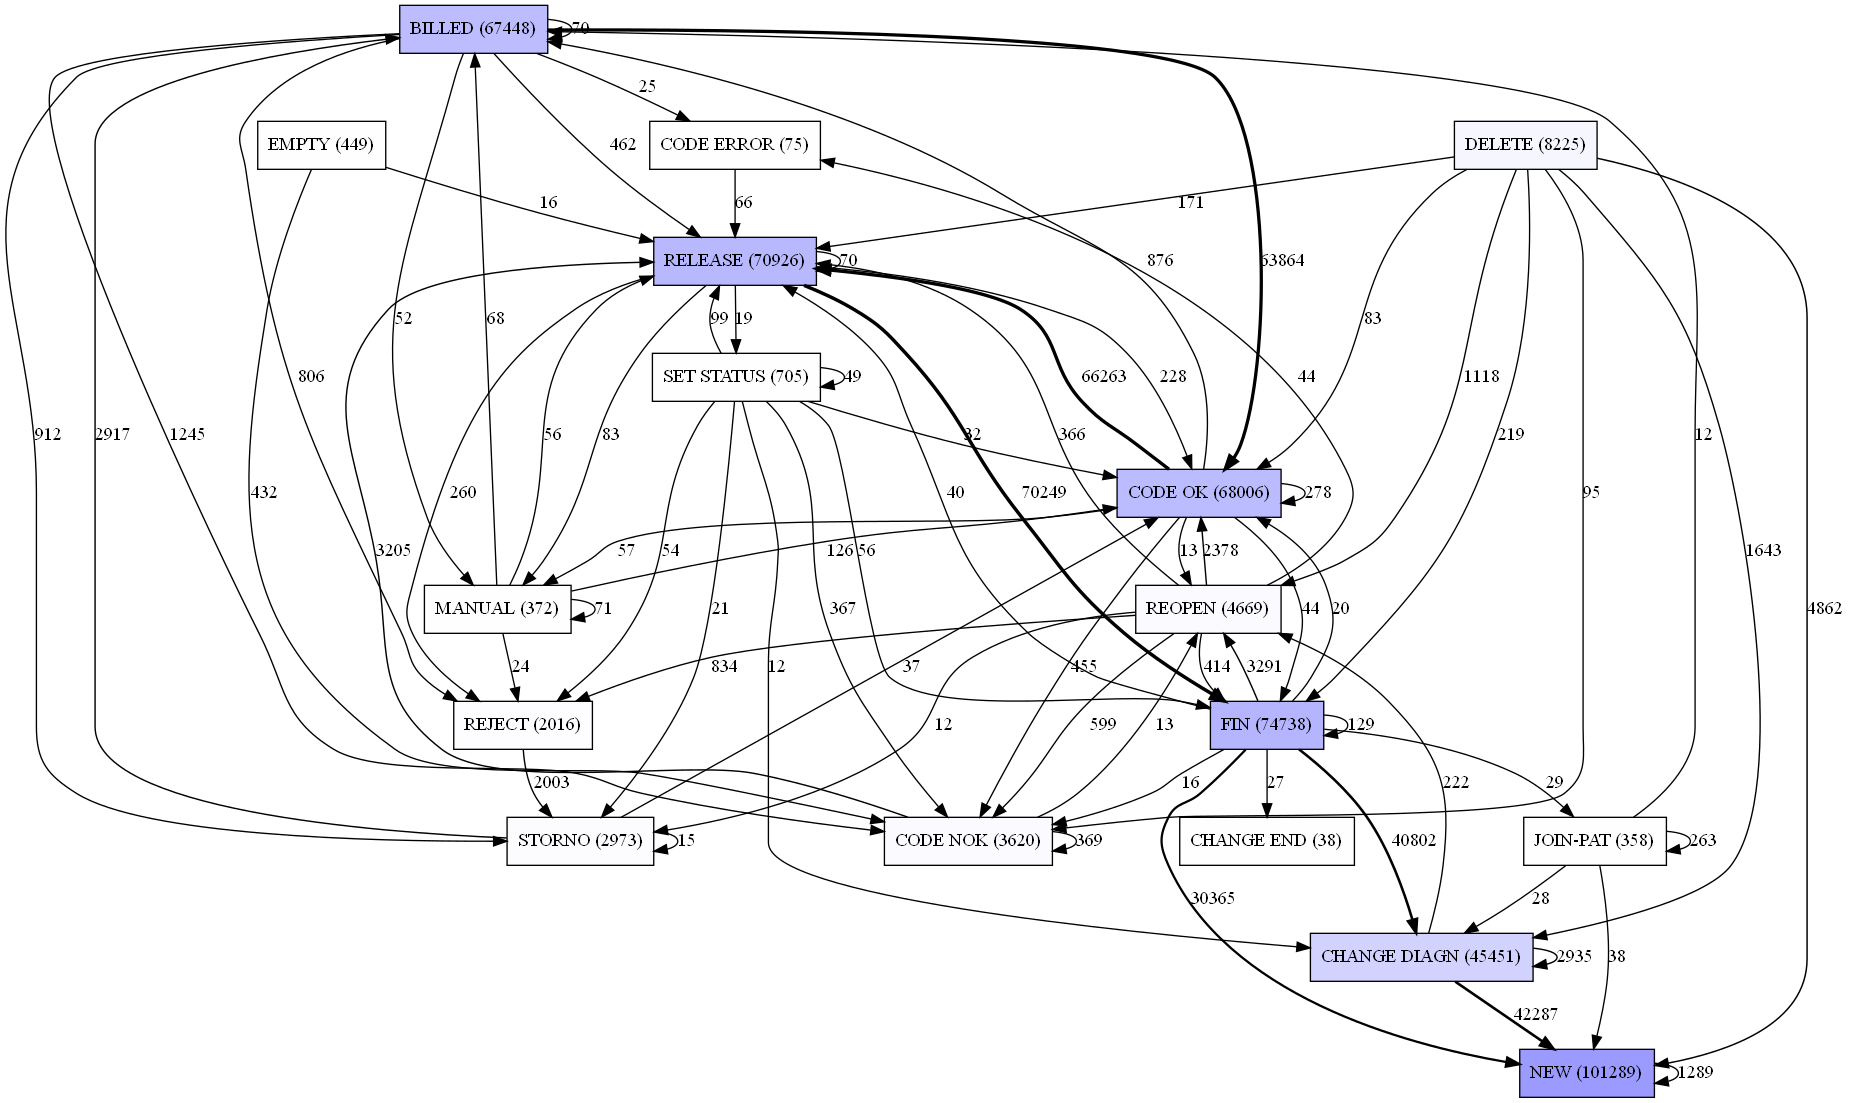

In [14]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(log)

from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [20]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
dataframe = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

In [38]:
dataframe

,actOrange,actRed,blocked,case:concept:name,caseType,closeCode,concept:name,diagnosis,flagA,flagB,...,isClosed,lifecycle:transition,msgCode,msgCount,msgType,org:resource,speciality,state,time:timestamp,version
0,NaN,NaN,NaN,IGPB,NaN,NaN,MANUAL,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,NaN,Released,2016-01-19 08:58:56+01:00,NaN
1,NaN,NaN,NaN,IGPB,NaN,NaN,BILLED,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,ResIA,NaN,Billed,2014-07-23 20:20:30+02:00,NaN
2,NaN,NaN,NaN,IGPB,NaN,NaN,RELEASE,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,NaN,Released,2014-04-28 23:15:17+02:00,NaN
3,NaN,NaN,NaN,IGPB,NaN,M,FIN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,ResNC,NaN,Closed,2014-04-28 23:14:44+02:00,NaN
4,NaN,NaN,False,IGPB,F,NaN,NEW,OH,False,False,...,True,complete,NaN,NaN,NaN,ResJA,G,In progress,2014-04-27 23:11:48+02:00,NaN
5,NaN,NaN,NaN,TUFE,NaN,H,FIN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,NaN,Empty,2016-01-18 23:30:03+01:00,NaN
6,NaN,NaN,False,TUFE,A,NaN,NEW,SB,False,False,...,True,complete,NaN,NaN,NaN,ResA,D,In progress,2015-09-21 03:03:41+02:00,NaN
7,NaN,NaN,NaN,NUFE,NaN,H,FIN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,NaN,Empty,2016-01-18 20:05:25+01:00,NaN
8,NaN,NaN,False,NUFE,A,NaN,NEW,SB,False,False,...,True,complete,NaN,NaN,NaN,ResA,D,In progress,2015-09-21 02:28:51+02:00,NaN
9,NaN,NaN,NaN,QMQE,NaN,NaN,DELETE,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,NaN,In progress,2016-01-18 10:33:52+01:00,NaN


In [51]:
timestamp=pd.to_datetime(dataframe['time:timestamp'] , utc=True)
timestamp

0        2016-01-19 07:58:56+00:00
1        2014-07-23 18:20:30+00:00
2        2014-04-28 21:15:17+00:00
3        2014-04-28 21:14:44+00:00
4        2014-04-27 21:11:48+00:00
5        2016-01-18 22:30:03+00:00
6        2015-09-21 01:03:41+00:00
7        2016-01-18 19:05:25+00:00
8        2015-09-21 00:28:51+00:00
9        2016-01-18 09:33:52+00:00
10       2016-01-11 12:27:04+00:00
11       2016-01-18 00:12:29+00:00
12       2016-01-16 12:25:20+00:00
13       2016-01-17 21:55:13+00:00
14       2016-01-17 21:55:06+00:00
15       2016-01-17 19:08:35+00:00
16       2016-01-17 19:05:36+00:00
17       2015-09-18 00:28:47+00:00
18       2016-01-17 11:37:45+00:00
19       2016-01-08 10:01:40+00:00
20       2016-01-08 10:01:21+00:00
21       2016-01-16 21:55:12+00:00
22       2016-01-16 21:55:07+00:00
23       2016-01-16 21:51:01+00:00
24       2016-01-16 21:50:57+00:00
25       2016-01-16 19:50:07+00:00
26       2016-01-16 19:15:22+00:00
27       2015-11-10 21:16:46+00:00
28       2016-01-16 

In [35]:
from pm4py.statistics.traces.pandas import case_statistics
variants_count = case_statistics.get_variant_statistics(dataframe,parameters={case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})


In [36]:
variants_count

[{'variant': 'BILLED,CODE OK,RELEASE,FIN,CHANGE DIAGN,NEW',
  'case:concept:name': 33673},
 {'variant': 'NEW', 'case:concept:name': 22373},
 {'variant': 'BILLED,CODE OK,RELEASE,FIN,NEW', 'case:concept:name': 20902},
 {'variant': 'DELETE,NEW', 'case:concept:name': 4813},
 {'variant': 'FIN,NEW', 'case:concept:name': 3508},
 {'variant': 'BILLED,CODE OK,RELEASE,FIN,CHANGE DIAGN,CHANGE DIAGN,NEW',
  'case:concept:name': 2121},
 {'variant': 'DELETE,CHANGE DIAGN,NEW', 'case:concept:name': 1555},
 {'variant': 'BILLED,CODE NOK,RELEASE,FIN,NEW', 'case:concept:name': 977},
 {'variant': 'BILLED,CODE OK,RELEASE,FIN,REOPEN,CODE OK,RELEASE,FIN,CHANGE DIAGN,NEW',
  'case:concept:name': 866},
 {'variant': 'CODE OK,BILLED,CODE OK,RELEASE,FIN,NEW',
  'case:concept:name': 512},
 {'variant': 'EMPTY,CODE NOK,RELEASE,FIN,NEW', 'case:concept:name': 400},
 {'variant': 'BILLED,RELEASE,FIN,NEW', 'case:concept:name': 359},
 {'variant': 'BILLED,REJECT,STORNO,BILLED,CODE OK,RELEASE,FIN,CHANGE DIAGN,NEW',
  'case:co

In [27]:
from pm4py.objects.conversion.log import converter

In [41]:
import pandas as pd
column = dataframe['time:timestamp']
column = pd.to_datetime(column,utc=True)

In [42]:
column

0        2016-01-19 07:58:56+00:00
1        2014-07-23 18:20:30+00:00
2        2014-04-28 21:15:17+00:00
3        2014-04-28 21:14:44+00:00
4        2014-04-27 21:11:48+00:00
5        2016-01-18 22:30:03+00:00
6        2015-09-21 01:03:41+00:00
7        2016-01-18 19:05:25+00:00
8        2015-09-21 00:28:51+00:00
9        2016-01-18 09:33:52+00:00
10       2016-01-11 12:27:04+00:00
11       2016-01-18 00:12:29+00:00
12       2016-01-16 12:25:20+00:00
13       2016-01-17 21:55:13+00:00
14       2016-01-17 21:55:06+00:00
15       2016-01-17 19:08:35+00:00
16       2016-01-17 19:05:36+00:00
17       2015-09-18 00:28:47+00:00
18       2016-01-17 11:37:45+00:00
19       2016-01-08 10:01:40+00:00
20       2016-01-08 10:01:21+00:00
21       2016-01-16 21:55:12+00:00
22       2016-01-16 21:55:07+00:00
23       2016-01-16 21:51:01+00:00
24       2016-01-16 21:50:57+00:00
25       2016-01-16 19:50:07+00:00
26       2016-01-16 19:15:22+00:00
27       2015-11-10 21:16:46+00:00
28       2016-01-16 

<AxesSubplot:xlabel='time:timestamp'>

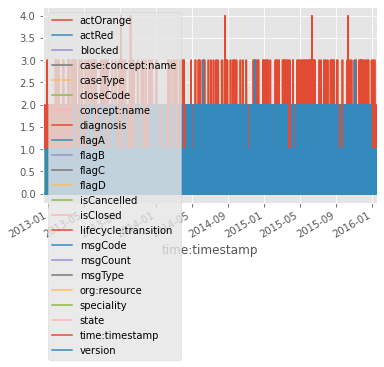

In [66]:
dataframe.groupby(timestamp).count().plot(kind="line")

<AxesSubplot:ylabel='Density'>

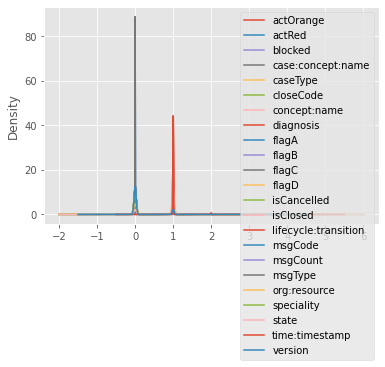

In [69]:
dataframe.groupby(timestamp).count().plot(kind="density")

time:timestamp
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

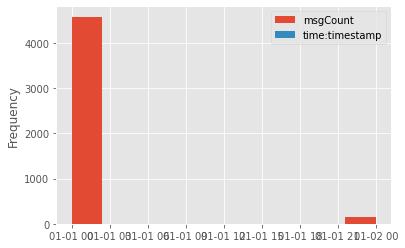

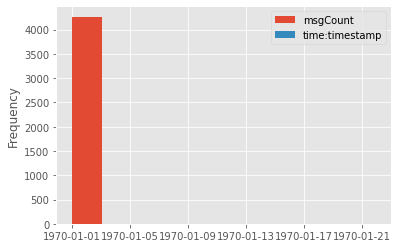

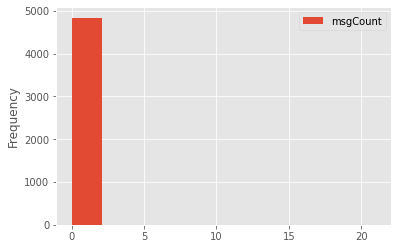

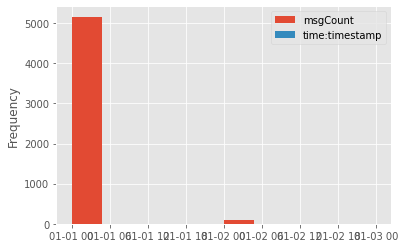

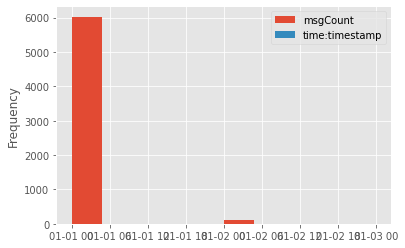

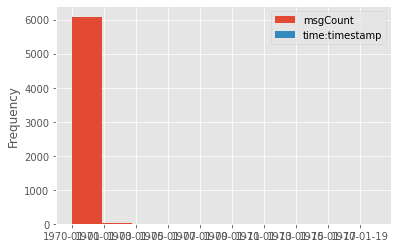

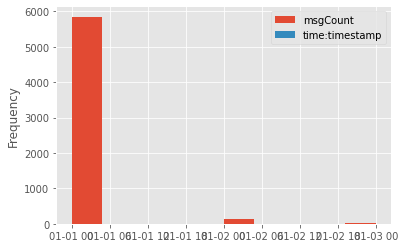

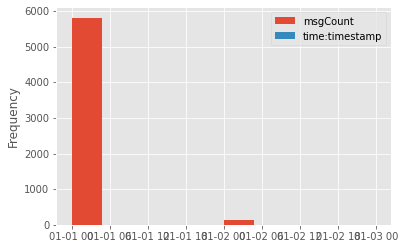

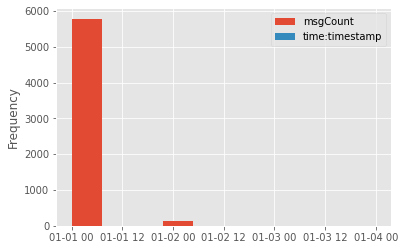

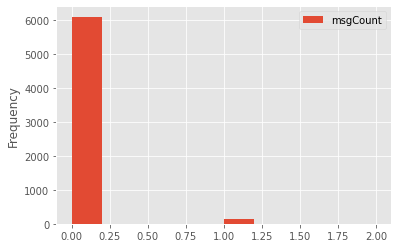

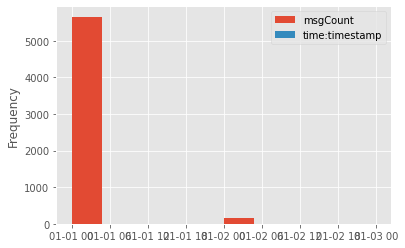

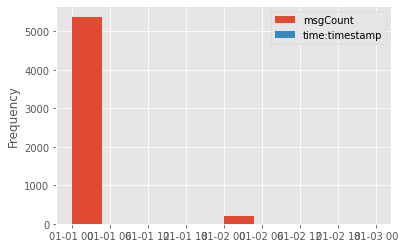

In [64]:
dataframe.groupby(timestamp.dt.month).count().plot(kind="hist")